# Deep Learning class exercise list 1

## Question 1

* ### Generating Data

In [859]:
import numpy as np
import matplotlib.pyplot as plt

In [877]:
def generate_data(data_size, train_val_split = 0.1):
    X = np.zeros((data_size, 3))
    y = np.zeros((data_size, 8))
    for i in range(data_size):
        arr = np.random.randint(0, 2, 3) + np.random.uniform(-0.1,0.1, 3)
        X[i] = np.round(arr,4)
        y[i][int(round(arr[0]) * 4 + round(arr[1]) * 2+ round(arr[2]))] = 1
    
    val_split = round(data_size * (1 - train_val_split))

    X_train, y_train = X[:val_split].T, y[:val_split].T
    X_val, y_val = X[val_split:].T, y[val_split:].T
    return X_train, X_val, y_train, y_val

In [939]:
def generate_data2(data_size, train_val_split = 0.1):
    X = np.zeros((data_size, 2))
    y = np.zeros((data_size, 4))
    for i in range(data_size):
        arr = np.random.randint(0, 2, 2) + np.random.uniform(-0.1,0.1, 2)
        X[i] = np.round(arr,4)
        y[i][int(round(arr[0]) * 2 + round(arr[1]) * 1)] = 1
    
#     val_split = round(data_size * (1 - train_val_split))
#     X_train, y_train = X[:val_split].T, y[:val_split].T
#     X_val, y_val = X[val_split:].T, y[val_split:].T
    return X.T, y.T

In [929]:
X_train, X_val, y_train, y_val = generate_data(20)

In [930]:
X_train.T, y_train.T

(array([[ 3.6000e-02, -8.7000e-02,  9.4880e-01],
        [-9.1400e-02,  3.0000e-04, -6.3400e-02],
        [ 1.0880e+00,  5.0800e-02, -9.9400e-02],
        [-1.0500e-02,  6.9700e-02,  9.7070e-01],
        [ 9.6630e-01,  8.3400e-02,  9.9470e-01],
        [ 8.1300e-02,  9.1710e-01, -5.6700e-02],
        [ 9.4430e-01,  1.0157e+00,  9.9320e-01],
        [ 9.3520e-01,  8.0500e-02,  1.0260e+00],
        [ 1.0468e+00, -8.7100e-02, -4.8600e-02],
        [ 1.0214e+00, -9.5200e-02,  9.7100e-02],
        [-4.6200e-02,  9.6050e-01,  1.0038e+00],
        [ 9.1590e-01, -8.9000e-03, -7.9600e-02],
        [ 1.0217e+00,  9.9650e-01, -8.4600e-02],
        [ 4.1900e-02,  8.1300e-02,  1.0011e+00],
        [ 1.0293e+00,  9.4340e-01,  9.0750e-01],
        [ 1.0790e+00,  6.5400e-02,  9.1680e-01],
        [ 9.0710e-01, -7.6100e-02,  9.7210e-01],
        [ 1.0249e+00, -4.5100e-02,  9.9200e-02]]),
 array([[0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.,

* ### MLP

In [931]:
def sigmoid(value):
    return 1/(1 + np.exp(-value))

def sigmoid_derivative(value):
    return sigmoid(value) * (1 - sigmoid(value))

In [932]:
def relu(value):
    return np.maximum(value, 0)

def relu_derivative(value):
    value[relu(value) <=0] = 0
    return value

In [1119]:
class MLP():
    def __init__(self):
        self.parameters = {}
        self.cache = {}
        self.grads = {}

    def fit(self, X_train, y_train):
        """
        args : 
        X_train = input data of shape (n_x, number_of_examples)
        y_train = label vector of shape (n_y, number_of_examples)
        """
        self.X_train = (X_train - np.mean(X_train))/np.std(X_train)
        self.y_train = y_train
        self.m = X_train.shape[1]
        self.hidden = relu
        self.output = sigmoid

    def initialize_parameters(self, dims):
        self.L = len(dims)
        for l in range(1, self.L):
            self.parameters["W" + str(l)] = np.random.randn(dims[l], dims[l-1]) * 0.001
            self.parameters["b" + str(l)] = np.zeros((dims[l], 1))
        return self.parameters
    
    def propagate(self):
        A_prev = self.X_train
        self.cache[f"A{0}"] = A_prev
        for l in range(1, self.L):
            
            Z = self.parameters[f"W{l}"] @ A_prev + self.parameters[f"b{l}"]
            #print(l)
            if l == self.L - 1:
                #print("sigmoid")
                A = self.output(Z)
            else:
                A = self.hidden(Z)

            self.cache[f"Z{l}"] = Z
            self.cache[f"A{l}"] = A
            
            A_prev = A
        
        self.y_hat = A

    def predict(self, X):
        A = X
        for l in range(1, self.L):
            Z = self.parameters[f"W{l}"] @ A + self.parameters[f"b{l}"]
            A = self.hidden(Z)
        
        return self.output(Z)
    
    def compute_diff(self):
        self.loss = - (np.divide(self.y_train, self.y_hat) - np.divide(1 - self.y_train, 1 - self.y_hat))
        #self.loss = self.y_hat - self.y_train
        #print(self.loss.shape)
        return self.loss
    
    def compute_grads(self):
        dZ = self.loss * sigmoid_derivative(self.cache[f"Z{self.L - 1}"])

        self.grads[f"dW{self.L - 1}"] = 1/self.m * (dZ @ self.cache[f"A{self.L - 2}"].T)
        self.grads[f"db{self.L - 1}"] = 1/self.m * np.sum(dZ, axis=1, keepdims=True)

        for l in reversed(range(1, self.L - 1)):
            self.grads[f"dA_prev{l}"] = self.parameters[f"W{l + 1}"].T @ dZ
            dZ = self.grads[f"dA_prev{l}"] * relu_derivative(self.cache[f"Z{l}"])
            self.grads[f"dW{l}"] = 1/self.m * (dZ @ self.cache[f"A{l - 1}"].T)
            self.grads[f"db{l}"] = 1/self.m * np.sum(dZ, axis=1, keepdims=True)
    
    def backprop(self, learning_rate = 0.001):
        self.learning_rate = learning_rate
        for l in reversed(range(1, self.L)):
            #print(l)
            self.parameters["W"+str(l)] -= self.learning_rate * (self.grads[f"dW{l}"])
            self.parameters["b"+str(l)] -= self.learning_rate * (self.grads[f"db{l}"])

    def compute_cost(self):
        logprods = np.dot(self.y_train, np.log(self.y_hat).T) + np.dot((1-self.y_train), np.log(1- self.y_hat).T)
        cost = -1/self.m*np.sum(logprods)
        return cost#np.sum(self.loss)

    def train(self, dims, learning_rate = 0.001, iterations = 1000):
        printing_interval = round(iterations * 0.01)
        self.initialize_parameters(dims)
        costs = []
        for i in range(iterations):
            self.propagate()
            loss = self.compute_diff()
            costs.append(self.compute_cost())
            self.compute_grads()
            self.backprop(learning_rate = learning_rate)
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

In [1120]:
mlpclf = MLP()

In [1121]:
X_train, y_train = (np.array([[ 0.998 ,  0.9855],
       [ 1.0479,  1.0063],
       [ 1.096 ,  1.0209],
       [ 0.9448,  0.0045],
       [ 1.082 , -0.0854],
       [ 1.0196,  0.0555]]).T,
np.array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]]).T)


In [1122]:
mlpclf.fit(X_train, y_train)

$$
Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]}
$$

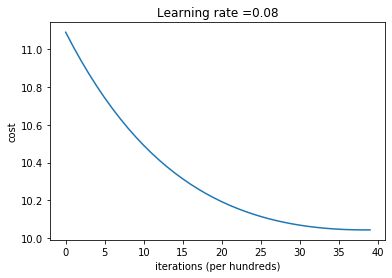

In [1123]:
mlpclf.train([X_train.shape[0],8,y_train.shape[0]], learning_rate=0.08, iterations=40)

In [1124]:
X_train.T

array([[ 0.998 ,  0.9855],
       [ 1.0479,  1.0063],
       [ 1.096 ,  1.0209],
       [ 0.9448,  0.0045],
       [ 1.082 , -0.0854],
       [ 1.0196,  0.0555]])

In [1125]:
y_train.T

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [1126]:
y_pred = mlpclf.predict(X_train)

In [1127]:
y_pred

array([[0.24401751, 0.24401744, 0.24401738, 0.24401801, 0.24401785,
        0.2440179 ],
       [0.24401826, 0.24401822, 0.24401818, 0.24401835, 0.24401819,
        0.24401831],
       [0.49999685, 0.49999673, 0.49999662, 0.4999983 , 0.49999814,
        0.49999809],
       [0.50000231, 0.50000241, 0.5000025 , 0.50000148, 0.50000158,
        0.50000166]])

In [1128]:
y_train.T

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [1129]:
np.argmax(y_pred, axis = 0)

array([3, 3, 3, 3, 3, 3])

In [1130]:
np.argmax(y_train, axis = 0)

array([3, 3, 3, 2, 2, 2])